# MIE1624 - Introduction to Data Science and Analytics
##Portfolio optimization

##### Import the necessary libraries and data

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [ ]:
#Load file and into dateframe
monthlyClosing_inSample = 'monthly_closings_2018_to_2020.csv'
monthlyClosing_outSample = 'monthly_closings_2021.csv'

df1 = pd.read_csv(monthlyClosing_inSample)
df2 = pd.read_csv(monthlyClosing_outSample)

#Remove date
price = df1.iloc[:,1:]

#Calculate monthly return as percent change of monthly closing values, reset indices 
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)


In [ ]:
ret

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
5,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390
6,0.373159,-0.048374,0.013596,-0.065267,-0.042503,0.001619,0.037981,0.168711,0.081932,0.018252,...,0.060185,-0.006594,0.023773,-0.131469,0.057807,0.196227,-0.034751,-0.028198,0.002198,0.074228
7,0.227255,0.028797,-0.026474,-0.058568,-0.024262,-0.047527,0.045529,0.076116,-0.011115,-0.064132,...,-0.009014,0.005700,0.023662,-0.132045,-0.004608,-0.004825,0.017464,0.010144,-0.015186,0.023321
8,-0.410489,-0.175474,-0.042908,-0.136441,0.032432,-0.062018,-0.121217,0.023424,-0.053605,-0.077040,...,-0.014314,-0.097053,-0.151222,-0.152134,-0.084312,-0.030478,-0.107185,-0.082438,-0.033853,-0.081551
9,0.169687,0.047711,0.026256,0.130588,0.003041,0.032727,0.075839,-0.291277,0.109264,-0.073654,...,0.076564,0.092820,0.144812,0.560175,-0.002650,-0.184045,-0.015634,0.069483,0.027047,0.028002


##### Compute the covariance matrix Q and means for each column 

In [ ]:
# Compute the covariance matrix of the percent change of prices
Q = ret.cov().to_numpy()

# Compute the mean for each column 
mu = np.array(np.mean(ret, axis = 0))

# Store number of stock
n = ret.shape[1] 

In [ ]:
Q.shape

(25, 25)

##### Solve for the minimum variance portfolio

Using the covarinace matrix, solve for the minimum variance portfolio. 

In [ ]:
# Create optimization variable w1, 25 total variables 
w1 = cp.Variable(n)

# Form the problem , minimize
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , [sum(w1) == 1 , w1 >= 0])

#Solve Problem
prob1.solve(verbose=False)

0.0009278939303461066

In [ ]:
# matrix of allocations which offers the minimum variance 
w_minVar = w1.value #solution value: minimum variance 
w_minVar

array([ 2.34711129e-19,  5.74342368e-20,  8.04981287e-21,  8.47499127e-20,
        1.98797463e-20,  1.09438721e-20,  2.73059820e-20,  2.72298977e-19,
        5.54485957e-02,  1.08374372e-19,  8.96580834e-20,  6.59194971e-01,
       -6.72518268e-20,  2.57092886e-20,  1.76013193e-03,  8.87191244e-02,
        5.48842212e-02, -5.82451441e-20, -4.53771831e-19,  3.42082904e-20,
       -3.00372479e-20,  8.76641923e-20,  9.01180838e-02, -1.21266431e-21,
        4.98748717e-02])

In [ ]:
#Compute the variance of the portfolio
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar)) #variance
var_minVar

0.0009278939303461066

In [ ]:
#Compute the return of the portfolio
ret_minVar = np.dot(mu, w_minVar) #expected return
ret_minVar

0.008653285914910974

##### Solve for the maximum return portfolio

Using the mean returns for each asset to compute the maximized return portfolio. 

In [ ]:
# Create optimization variable w2, 26 total variables 
w2 = cp.Variable(n)

constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)
                   
# Solve the problem 
prob2.solve(verbose=False)

0.10211634693131112

In [ ]:
# matrix of allocations which offers th
w_maxRet = w2.value #solution value: maximum expected return
w_maxRet

array([4.00446548e-11, 2.33109307e-11, 2.11897359e-11, 2.02514098e-11,
       2.13526329e-11, 2.10766672e-11, 2.36702189e-11, 2.30281285e-11,
       2.20156291e-11, 1.84127143e-11, 1.42266918e-11, 1.97676580e-11,
       1.08469522e-09, 1.88147921e-11, 2.37054996e-11, 1.85314356e-11,
       2.26815424e-11, 2.41212002e-11, 9.99999998e-01, 1.68558532e-11,
       8.78989871e-12, 2.30303335e-11, 2.19747280e-11, 2.02437375e-11,
       1.72961019e-11])

In [ ]:
#Compute the variance of the portfolio
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet)) #variance
var_maxRet

0.33974851965068004

In [ ]:
#Compute the return of the portfolio
ret_maxRet = np.dot(mu, w_maxRet) #expected return
ret_maxRet

0.10211634693131112

##### Compute classical Markowitz efficent frontier 

For each expected return, ranging from the return of the minimum variance portfolio to return of the maximum return portfolio, compute the optimal portfolio. The set of these optimal portfolios equals the efficient fronteir for the given dataset.

In [ ]:
#Create tareget ranges for portfolio returns
targetLen = 50
#targetRet = np.linspace(ret_minVar,ret_maxRet,50)
targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)


In [ ]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps,sum(w) == 1,w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)


In [ ]:
# Compute efficient frontier
w_front_clas = []
var_front_clas = []
ret_front_clas = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))

In [ ]:
len(var_front_clas)

50

In [ ]:
len(ret_front_clas)

50

In [ ]:
np.array(w_front_clas).shape

(50, 25)

##### Compute the resampled efficient frontier 

To compute the resampled frontier, from the origional dateset compute simulated (resampled) data. Form each resampled dataset, compute the new efficient frontier. The efficient frontier for the resampled data is found as the average weight of each asset at each return level along each resampled frontier.

In [ ]:
sample_size = ret.shape[0] 
repetition = 100 #100 time simulations

#set variables for storing resuts
w_RE = []
var_RE = []
ret_RE = []

#Usa a random seed so that results will be consistent 
np.random.seed(10)

#Resample by taking n (sample size) draws from the original input
for i in range(repetition):
    
    #resample by drawing from the multivariate normal distribution with mu and Q
    x_resample = np.random.multivariate_normal(mu, Q, sample_size)
    
    #Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample) 
    #resampled mu and Q
    mu_resample = np.array(np.mean(x_resample, axis = 0))
    Q_resample =np.cov(x_resample.T)
    

    #Compute minimum variance
    w4 = cp.Variable(n)
    constraints4 = [sum(w4) == 1 , w4 >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w4,Q_resample)) , [sum(w4) == 1 , w4 >= 0])
    #Solve Problem
    prob4.solve(verbose=False)
    w_minVar = w4.value #solution value: minimum variance
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar)) #variance
    ret_minVar = np.dot(mu_resample, w_minVar) #expected return

    #compute maximum expected return
    w5 = cp.Variable(n)
    constraints5 = [sum(w5) == 1, w5 >= 0]
    prob5 = cp.Problem(cp.Maximize(mu_resample.T@w5), constraints5)
    # Solve the problem 
    prob5.solve(verbose=False)
    w_maxRet = w5.value #solution value: maximum expected return
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet)) #variance
    ret_maxRet = np.dot(mu_resample, w_maxRet) #expected return

    #target return
    targetRet = np.linspace(ret_minVar,ret_maxRet,50)
    
    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()
    constraints6 = [mu_resample.T@w_re >= eps_re,sum(w_re) == 1,w_re >= 0]
    prob6 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints6)
    
    # Compute efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    for epsilon in targetRet:
        eps_re.value = epsilon
        prob6.solve(verbose=False,solver=cp.ECOS)
        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
        
    #Store results for each resampling
    w_RE.append(w_front_re)




In [ ]:
np.array(w_RE).shape

(100, 50, 25)

In [ ]:
#compute the average weights at each return level
average_w = np.mean(np.array(w_RE), axis=0)
average_w.shape

(50, 25)

In [ ]:
average_w

array([[ 1.11084509e-09,  8.21549923e-05,  4.00753549e-09, ...,
         7.57856403e-02,  1.15650783e-02,  3.87664106e-02],
       [ 9.68248223e-04,  7.63934886e-06,  2.16322583e-09, ...,
         6.13815365e-02,  1.63030794e-02,  6.28786561e-02],
       [ 3.19835959e-03,  4.39270836e-10,  2.02898477e-09, ...,
         4.73568520e-02,  2.07470909e-02,  8.02371162e-02],
       ...,
       [ 2.11993898e-01,  7.71989423e-05,  1.43948774e-11, ...,
         9.58064251e-12,  7.67355178e-04,  1.53632593e-03],
       [ 1.89792377e-01, -6.83896550e-14,  1.16270783e-11, ...,
         5.12222315e-12,  2.34540730e-04,  7.68163176e-04],
       [ 1.79999990e-01,  1.48044079e-10,  1.87724502e-10, ...,
         1.79926738e-10,  1.99590347e-10,  2.06724957e-10]])

In [ ]:
#compute the resampled efficient frontier based on the average weights and orignial mu & 
for i in range(average_w.shape[0]):
    var_RE.append(np.dot(average_w[i], np.dot(Q,average_w[i])))
    ret_RE.append(np.dot(mu,average_w[i]))

In [ ]:
len(var_RE)

50

In [ ]:
len(ret_RE)

50

##### For the classical frontier, determine and store the portfolio weights for the minimum variance, maximum return, and Sharpe ratio optimized portfolio's

The Sharpe ratio of each portfolio is calculatd as the (portfolio return - the risk free rate) / portfolio standard deviation
Use a risk free rate of 0.2% (0.002) monthly.

In [ ]:
riskFreeRate = 0.002

In [ ]:
#Determine weights of minimum variance and maximum return along the efficient frontier 

#Min variance
orig_weights_minVar = w_front_clas[0]
print(orig_weights_minVar)

#Max return 
orig_weights_maxRet = w_front_clas[targetLen - 1] #index 49 since it starts from 0
print(orig_weights_maxRet)

[ 3.27228584e-19 -1.14156500e-20 -8.32132867e-22  1.11996409e-19
  1.90860374e-20  1.69996871e-20 -2.67197223e-20  8.07709211e-20
  5.54485957e-02  8.99770052e-20  9.08767459e-20  6.59194971e-01
  9.71725692e-20  3.48206388e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25236531e-20 -1.26937729e-20  4.97857917e-20
  4.42487675e-20  2.33168848e-20  9.01180838e-02  8.74759468e-21
  4.98748717e-02]
[-1.31076175e-15 -6.16532908e-15 -5.19955479e-15 -4.94670607e-15
 -5.26864595e-15 -5.16437804e-15 -6.33879110e-15 -5.85374431e-15
 -5.49017626e-15 -4.51582643e-15 -3.84820492e-15 -4.82624428e-15
  5.15958212e-09 -4.59750960e-15 -6.38737007e-15 -4.54608646e-15
 -5.74465164e-15 -6.86114499e-15  9.99999995e-01 -4.24604282e-15
 -3.09633125e-15 -5.91829452e-15 -5.46383566e-15 -4.93577998e-15
 -4.31384810e-15]


In [ ]:
#Compute sharp ratio 
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()] #find weights that maximize sharpe ratio 
print(sharpe_array_clas)
print(sharpe_array_clas.argmax())
print(weights_sharpe_clas)

[0.21841729 0.27800793 0.32774795 0.36827174 0.4008275  0.42613411
 0.44630936 0.46246746 0.47543186 0.48587106 0.49430315 0.50103627
 0.5064046  0.51069581 0.51411326 0.51665943 0.51848227 0.5197395
 0.52055446 0.52102369 0.52122284 0.52121134 0.52103597 0.52073366
 0.52033363 0.51985904 0.5193283  0.51875604 0.51815393 0.51753126
 0.51689544 0.51625237 0.51560673 0.51496224 0.51432183 0.51368778
 0.5130289  0.51215006 0.50586457 0.49160956 0.47226911 0.45041653
 0.42794104 0.40604084 0.38566114 0.3420309  0.28395628 0.23536734
 0.19889106 0.17176165]
20
[ 3.03160097e-01 -2.50293341e-22 -2.23397376e-22 -1.00052630e-21
  2.75368807e-22  1.36194923e-22  1.05617461e-22  1.36074705e-21
  8.19141242e-22  1.14564300e-22 -1.41584732e-22  4.07725910e-01
  1.68209250e-01 -4.05968671e-22  1.73259338e-21 -1.13906627e-21
 -6.20870420e-22  6.78484559e-22  2.27436297e-02  1.39237048e-22
  9.81611134e-02 -2.21432435e-22 -1.21327571e-21  1.18966859e-22
 -1.83139242e-22]


##### For the resampled frontier, determine and store the portfolio weights for the minimum variance, maximum return, and Sharpe ratio optimized portfolio's:


In [ ]:
#Determine weights of minimum variance and maximum return along the efficient frontier 

#Min variance
re_weights_minVar = average_w[0]
print(re_weights_minVar)

#Max return 
re_weights_maxRet = average_w[50 - 1] #index 49 since it starts from 0
print(re_weights_maxRet)

[1.11084509e-09 8.21549923e-05 4.00753549e-09 2.93303121e-03
 4.00902256e-03 1.74221516e-09 1.11883125e-09 7.38273548e-03
 4.02577604e-02 1.41045772e-09 6.13914877e-03 6.25975853e-01
 4.30060132e-10 1.57971234e-02 9.97818100e-03 9.04721337e-02
 6.84701436e-02 2.80276905e-04 6.06782693e-04 3.70535900e-09
 1.49850868e-03 1.12707112e-09 7.57856403e-02 1.15650783e-02
 3.87664106e-02]
[1.79999990e-01 1.48044079e-10 1.87724502e-10 1.85840833e-10
 1.76862688e-10 1.88306873e-10 1.56288949e-10 1.75196438e-10
 1.72927493e-10 1.99007372e-10 2.32531192e-10 2.00907145e-10
 4.19999992e-01 2.10016017e-10 1.55089100e-10 2.11665253e-10
 1.77879122e-10 1.46391276e-10 3.90000014e-01 2.09642431e-10
 1.00000002e-02 1.63705660e-10 1.79926738e-10 1.99590347e-10
 2.06724957e-10]


In [ ]:
#Compute sharp ratio 
ret_array_re = np.array(ret_RE)
var_array_re = np.array(var_RE)

sharpe_array_re = (ret_array_re - riskFreeRate)/np.sqrt(var_array_re)

weights_sharpe_re = average_w[sharpe_array_re.argmax()] #find weights that maximize sharpe ratio 
print(sharpe_array_re)
print(sharpe_array_re.argmax())
print(weights_sharpe_re)

[0.21014849 0.25120868 0.28755214 0.31962755 0.347646   0.37224238
 0.39321944 0.41094228 0.42543412 0.43717994 0.44657282 0.45399318
 0.46006309 0.46488832 0.46866392 0.47195427 0.47493744 0.47743024
 0.4796611  0.48159676 0.48350888 0.48520908 0.48665398 0.48775507
 0.48860298 0.48929092 0.48893951 0.48827596 0.48727999 0.48543084
 0.48293152 0.47956925 0.47532595 0.47058879 0.46550567 0.45950063
 0.45324893 0.44662879 0.43952001 0.43213738 0.42422558 0.41573241
 0.4060741  0.39642507 0.38542618 0.37338393 0.36124418 0.34991001
 0.33909098 0.32734582]
25
[2.92723236e-01 1.12509994e-04 1.66172827e-10 1.70720962e-02
 6.07824211e-03 1.41909720e-10 5.45820707e-11 7.56305075e-04
 2.93823260e-10 1.13433529e-02 1.46250415e-02 1.24154530e-01
 2.08062687e-01 2.00524794e-02 1.39124058e-03 6.65286713e-02
 1.81383566e-04 4.71680859e-11 6.30717510e-02 3.02393803e-10
 1.04613539e-01 1.01144243e-10 3.44583927e-10 1.88511207e-02
 5.03818134e-02]


##### For each of the 6 portfolios, calculate the expected return on the 2021 (out-of-sample) data


In [ ]:
#drop date
price2021 = df2.iloc[:,1:]

#We want return for the whole year so only use first and last month
price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

#Compute percent change
ret_2021 = price2021_.pct_change().iloc[1:,:]

ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [ ]:
#From classical frontier find
#Minimum variance portfolio
#orig_weights_minVar
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)


#Maximum return portfolio
#orig_weights_maxRet
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

#Sharpe ratio portfolio
#orig_weights_sharpe
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)


[0.02822425]
[-0.58459094]
[0.27958832]


In [ ]:
#Compute returns on $1000 for RE
#Minimum variance portfolio
re_minVar_ret2021 = np.dot(ret_2021, re_weights_minVar)
print(re_minVar_ret2021)


#Maximum return portfolio
re_maxRet_ret2021 = np.dot(ret_2021, re_weights_maxRet)
print(re_maxRet_ret2021)


#Sharpe ratio portfolio
re_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_re)
print(re_sharpe_ret2021)


print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , re_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , re_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , re_sharpe_ret2021*1000)

[0.0590658]
[0.03733404]
[0.32728394]
Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-584.59094047]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.5883226] 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [59.06580056]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [37.33403957]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [327.28394219]


### 3. Plot the classical and resampled efficient frontiers [10pts]

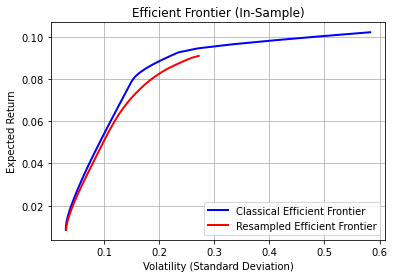

In [ ]:

axC = plt.gca()
plt.rcParams['figure.figsize'] = [9, 8]

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=2, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_RE), ret_RE, color='red', linewidth=2, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier (In-Sample)')
axC.legend(loc="lower right")
axC.grid()
plt.show()


### 4.	Plot the portfolio compositions for classical and resampled frontiers. [15pts]

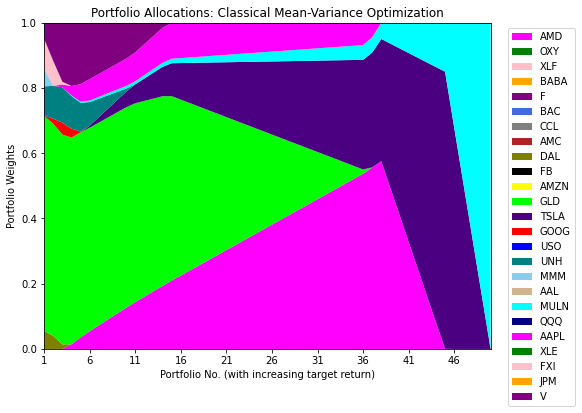

In [ ]:
# classical 
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

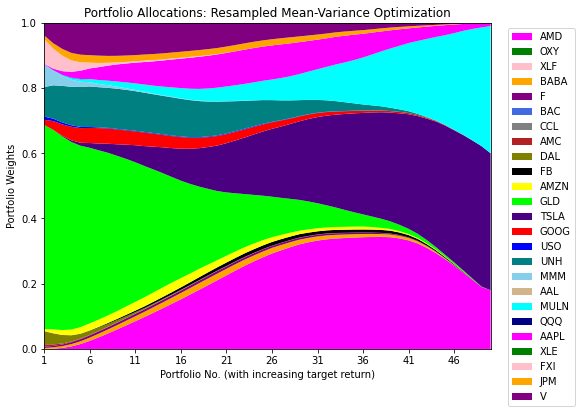

In [ ]:
#Resampled

x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(average_w).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled Mean-Variance Optimization")
plt.show()
